<a href="https://colab.research.google.com/github/SonramSirirat/everything-starts-with-data/blob/main/Workshop_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop - 5 extend as homework

*   Use the previous preprocessed adult data set, and apply the KNN learning algorithm through scklearn
*   You are required to program in Python submit your ipybn file to the google class room with the following results.
*   Report Accuracy rate, Confusion matrix, Plot train vs test dataset, Plot of Cross validation.
*   What is the optimal k?
*   Write 1 paragraph discuss the result of your model.


# Import Data

In [11]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
url = "https://raw.githubusercontent.com/SonramSirirat/everything-starts-with-data/main/Workshop_5/adult_pre.csv?raw=True"
df = pd.read_csv(url)
print(df.head(5))

   age          workclass  fnlwgt  ... hours.per.week  native.country  income
0   50   Self-emp-not-inc   83311  ...             13   United-States   <=50K
1   38            Private  215646  ...             40   United-States   <=50K
2   53            Private  234721  ...             40   United-States   <=50K
3   28            Private  338409  ...             40            Cuba   <=50K
4   37            Private  284582  ...             40   United-States   <=50K

[5 rows x 16 columns]


# Selection Attribute

   age          workclass  fnlwgt  ... hours.per.week  native.country  income
0   50   Self-emp-not-inc   83311  ...             13   United-States   <=50K
1   38            Private  215646  ...             40   United-States   <=50K
2   53            Private  234721  ...             40   United-States   <=50K
3   28            Private  338409  ...             40            Cuba   <=50K
4   37            Private  284582  ...             40   United-States   <=50K

[5 rows x 16 columns]
Train Shape X: (22571, 8) Y : (22571, 1)
Test Shape X: (5643, 8) Y : (5643, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


              precision    recall  f1-score   support

       <=50K       0.84      0.82      0.83      4597
        >50K       0.28      0.31      0.29      1046

    accuracy                           0.72      5643
   macro avg       0.56      0.56      0.56      5643
weighted avg       0.73      0.72      0.73      5643



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


              precision    recall  f1-score   support

       <=50K       0.82      0.96      0.88      4597
        >50K       0.30      0.08      0.13      1046

    accuracy                           0.80      5643
   macro avg       0.56      0.52      0.51      5643
weighted avg       0.73      0.80      0.74      5643



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


              precision    recall  f1-score   support

       <=50K       0.83      0.90      0.86      4597
        >50K       0.27      0.16      0.20      1046

    accuracy                           0.76      5643
   macro avg       0.55      0.53      0.53      5643
weighted avg       0.72      0.76      0.74      5643



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


              precision    recall  f1-score   support

       <=50K       0.82      0.97      0.89      4597
        >50K       0.30      0.06      0.10      1046

    accuracy                           0.80      5643
   macro avg       0.56      0.51      0.49      5643
weighted avg       0.72      0.80      0.74      5643



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


              precision    recall  f1-score   support

       <=50K       0.82      0.94      0.88      4597
        >50K       0.29      0.11      0.16      1046

    accuracy                           0.79      5643
   macro avg       0.56      0.52      0.52      5643
weighted avg       0.72      0.79      0.74      5643

4


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[0.78671096 0.77868852 0.77691626 0.77536553 0.78090385]
0.7797170265412736
[[4320  277]
 [ 933  113]]


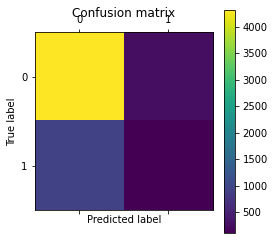

In [10]:
# X = df[["age","workclass","fnlwgt","education","education.num","marital.status","occupation","relationship","race","sex.Female","sex.Male","capital.gain","capital.loss","hours.per.week","native.country"]]
# X = df[["age","fnlwgt","education.num","sex.Female","sex.Male","capital.gain","capital.loss","hours.per.week"]]
X = df[["age", "fnlwgt", "education.num", "sex.Female", "sex.Male", "capital.gain", "capital.loss", "hours.per.week"]]
y = df[["income"]]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)
print('Train Shape X: {} Y : {}'.format(X_train.shape,y_train.shape))
print('Test Shape X: {} Y : {}'.format(X_test.shape,y_test.shape))

# https://medium.com/mmp-li/k-nn-%E0%B8%81%E0%B8%B1%E0%B8%9A-sklearn-machine-learning-101-81350e8402f0
# สร้างโมเดล K-NN แล้วด้วยการเรียก Library KNeighborsClassifier โดยเราจะกำหนดเพื่อนบ้านไว้ที่ 1 คนก่อน
from sklearn.neighbors import KNeighborsClassifier
n = 5
k = 0
acc = 0
for i in range(1,n+1):
    knn = KNeighborsClassifier(n_neighbors = i)
    #จากนั้นฝึกฝนโมเดลด้วยคำสั่ง fit(X,y) โดยให้ใส่ข้อมูลฝึกฝนที่ X และเฉลยที่ y
    knn.fit(X_train,y_train)
    #ทำการทดสอบโมเดลโดยการนำชุดข้อมูลทดสอบเข้าไปทำนายด้วยคำสั่ง predict() โดยรอบนี้เราไม่ต้องใส่เฉลยเข้าไป ให้ใส่แค่ข้อมูลที่ต้องการทดสอบ
    answer = knn.predict(X_test)
    #ตรวจสอบว่าโมเดล โดยเราจะใช้ classification_report ที่สามารถดึงค่า precision , recall , f1-score จากการเทียบระหว่างสิ่งที่โมเดลทำนายกับเฉลยได้เลย
    from sklearn.metrics import classification_report
    print(classification_report(y_test, answer))
    #https://medium.com/mmp-li/evaluate-model-precision-recall-f1-score-machine-learning-101-89dbbada0c96
    from sklearn.metrics import accuracy_score
    accore = accuracy_score(y_test, answer)
    from sklearn.metrics import confusion_matrix
    if acc < accore:
        k = i
        acc = accore
print(k)

from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X_train,y_train,cv=5,scoring='accuracy')
print(score)
avg = sum(score)/len(score)
print(avg)

# https://scikit-learn.org/0.15/auto_examples/plot_confusion_matrix.html
# Run classifier

# Compute confusion matrix
cm = confusion_matrix(y_test, answer)

print(cm)

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# https://drive.google.com/file/d/1vMzYHbYAiG6l_pwitjtVAVmQT1MCRWw_/view?usp=sharing
# https://dsdi.msu.ac.th/?article=data-science&fn=train_test_split